In [1]:
! pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 81.5 MB/s eta 0:00:00


In [2]:
from astroquery.jplhorizons import Horizons
import numpy as np
import plotly.graph_objects as go

# Get the ephemeris for the Sun and Mar
mars = Horizons(id='499', location='675', epochs={'start': '1601-01-01', 'stop': '1602-12-31', 'step': '1d'}) #1601-12-31
sun = Horizons(id='Sun', location='675', epochs={'start': '1601-01-01', 'stop': '1602-12-31', 'step': '1d'})

mars_epth = mars.ephemerides()
sun_epth = sun.ephemerides()

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u

mars_ang_width = mars_epth['ang_width']
sun_ang_width = sun_epth['ang_width']

mars_ra = mars_epth['RA']
mars_dec = mars_epth['DEC']

sun_ra = sun_epth['RA']
sun_dec = sun_epth['DEC']

In [4]:
m = SkyCoord(np.array(mars_ra)*u.degree, np.array(mars_dec)*u.degree, 0.00486759341* 0.00465047 / np.tan(np.radians(mars_ang_width / 3600) / 2))
m.represent_as('cartesian')
s = SkyCoord(np.array(sun_ra)*u.degree, np.array(sun_dec)*u.degree, 0.00465047 / np.tan(np.radians(sun_ang_width / 3600) / 2))
s.represent_as('cartesian')

<CartesianRepresentation (x, y, z) [dimensionless]
    [( 0.27622765, -8.64987756e-01, -3.75963703e-01),
     ( 0.29297734, -8.60368192e-01, -3.73953868e-01),
     ( 0.30963635, -8.55479938e-01, -3.71827074e-01),
     ( 0.32619892, -8.50324129e-01, -3.69584035e-01),
     ( 0.34265955, -8.44902013e-01, -3.67225302e-01),
     ( 0.35901295, -8.39215917e-01, -3.64751790e-01),
     ( 0.37525341, -8.33267400e-01, -3.62164189e-01),
     ( 0.39137613, -8.27058662e-01, -3.59463874e-01),
     ( 0.40737548, -8.20592177e-01, -3.56651388e-01),
     ( 0.4232466 , -8.13869879e-01, -3.53728065e-01),
     ( 0.43898432, -8.06894770e-01, -3.50694775e-01),
     ( 0.4545839 , -7.99668929e-01, -3.47553004e-01),
     ( 0.47004077, -7.92195315e-01, -3.44303609e-01),
     ( 0.48535036, -7.84476847e-01, -3.40947922e-01),
     ( 0.50050801, -7.76515559e-01, -3.37486761e-01),
     ( 0.5155099 , -7.68315181e-01, -3.33921961e-01),
     ( 0.53035144, -7.59877439e-01, -3.30254004e-01),
     ( 0.54502887, -7.51205727e

In [5]:
fig = go.Figure(data=[go.Scatter3d(x=m.represent_as('cartesian').x -s.represent_as('cartesian').x,
                                   y=m.represent_as('cartesian').y -s.represent_as('cartesian').y,
                                   z=m.represent_as('cartesian').z -s.represent_as('cartesian').z, mode='markers',  marker_color='red')])
fig.add_trace(go.Scatter3d(x=-s.represent_as('cartesian').x,
                           y=-s.represent_as('cartesian').y,
                           z=-s.represent_as('cartesian').z, mode='markers', marker_color='blue'))
fig.show()


## Install AI Feynman

In [6]:
!git clone https://github.com/zykhoo/AI-Feynman.git

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 96 (delta 14), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (96/96), 14.98 MiB | 8.28 MiB/s, done.


In [7]:
!cd /content/AI-Feynman

In [8]:
import matplotlib.pyplot as plt
!pip install matplotlib-label-lines
from labellines import labelLine, labelLines

In [9]:
!nvidia-smi

!lsb_release -a

!python3 --version

/bin/bash: nvidia-smi: command not found
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.6 LTS
Release:	20.04
Codename:	focal
Python 3.10.12


Look at what we downloaded

In [10]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

aifeynman     examples	MANIFEST.in	  README.md	    setup.cfg
example_data  LICENSE	mars_experiments  requirements.txt  setup.py


Fix broken requirements file (may not be needed if later versions fix this).

In [11]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [12]:
!pip install -r AI-Feynman/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


Check that fortran is installed

In [13]:
!gfortran --version

GNU Fortran (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [14]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.6 LTS
Release:	20.04
Codename:	focal


Install the csh shell

In [15]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 243 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 csh amd64 20110502-5 [243 kB]
Fetched 243 kB in 1s (441 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 123105 files and directories currently installed.)

Set loose permissions to avoid some reported file permissions issues

In [16]:
!chmod +777 /content/AI-Feynman/aifeynman/*

Compile the fortran code

Look at the code directory

In [17]:
!ls -l /content/AI-Feynman/aifeynman

total 1304
-rwxrwxrwx 1 root root     11 Jul 19 03:03 10ops.txt
-rwxrwxrwx 1 root root     15 Jul 19 03:03 14ops.txt
-rwxrwxrwx 1 root root     19 Jul 19 03:03 19ops.txt
-rwxrwxrwx 1 root root      8 Jul 19 03:03 7ops.txt
-rwxrwxrwx 1 root root 960508 Jul 19 03:03 arity2templates.txt
-rwxrwxrwx 1 root root   4297 Jul 19 03:03 dimensionalAnalysis.py
-rwxrwxrwx 1 root root    952 Jul 19 03:03 get_demos.py
-rwxrwxrwx 1 root root   6168 Jul 19 03:03 get_pareto.py
-rwxrwxrwx 1 root root   1745 Jul 19 03:03 getPowers.py
-rwxrwxrwx 1 root root    247 Jul 19 03:03 __init__.py
-rwxrwxrwx 1 root root    155 Jul 19 03:03 resources.py
-rwxrwxrwx 1 root root   2395 Jul 19 03:03 RPN_to_eq.py
-rwxrwxrwx 1 root root   5205 Jul 19 03:03 RPN_to_pytorch.py
-rwxrwxrwx 1 root root   5383 Jul 19 03:03 S_add_bf_on_numbers_on_pareto.py
-rwxrwxrwx 1 root root   7908 Jul 19 03:03 S_add_snap_expr_on_pareto.py
-rwxrwxrwx 1 root root    990 Jul 19 03:03 S_add_sym_on_pareto.py
-rwxrwxrwx 1 root root   1540 Jul 19 0

Compile .f files into .x files

In [18]:
import os
os.chdir("/content/AI-Feynman/") #&& ./compile.sh
!ls
!python3 /content/AI-Feynman/setup.py install


Streaming output truncated to the last 5000 lines.
aifeynman/symbolic_regress2.f90:199:1:

  199 |    if (arity.eq.0) then ! This is a nonary function
      | 1
aifeynman/symbolic_regress2.f90:200:1:

  200 |      if (op.eq."0") then
      | 1
aifeynman/symbolic_regress2.f90:202:1:

  202 |      else if (op.eq."1") then
      | 1
aifeynman/symbolic_regress2.f90:203:1:

  203 |        y = 1.
      | 1
aifeynman/symbolic_regress2.f90:204:1:

  204 |      else if (op.eq."P") then
      | 1
aifeynman/symbolic_regress2.f90:205:2:

  205 |         y = 4.*atan(1.) ! pi
      |  1
aifeynman/symbolic_regress2.f90:207:5:

  207 |            y = x(ichar(op)-96)
      |     1
aifeynman/symbolic_regress2.f90:208:1:

  208 |      end if
      | 1
aifeynman/symbolic_regress2.f90:209:1:

  209 |    else if (arity.eq.1) then ! This is a unary function
      | 1
aifeynman/symbolic_regress2.f90:210:1:

  210 |      if (op.eq.">") then
      | 1
aifeynman/symbolic_regress2.f90:212:1:

  212 |      else if

# Experiment 1

In [19]:
s_m = SkyCoord(-s.represent_as('cartesian').x + m.represent_as('cartesian').x,
               -s.represent_as('cartesian').y + m.represent_as('cartesian').y,
               -s.represent_as('cartesian').z + m.represent_as('cartesian').z, representation_type='cartesian') #view of mars from sun
s_e = SkyCoord(-s.represent_as('cartesian').x,
               -s.represent_as('cartesian').y,
               -s.represent_as('cartesian').z, representation_type='cartesian') #view of earth from sun

In [20]:
from statistics import variance

def PCA(X):
  inertia = np.dot(X.transpose(), X)
  e_values, e_vectors = np.linalg.eig(inertia)
  order = np.argsort(e_values)
  e_vectors = e_vectors[:, order].transpose()
  X_Projected=np.column_stack(([np.dot(X,e_vectors[i,:]) for i in reversed(range(len(e_values)))]))
  return X_Projected

mars_projected = PCA(np.array([s_m.x, s_m.y, s_m.z]).T)
print([variance(mars_projected[:,0]),variance(mars_projected[:,1]),variance(mars_projected[:,2])]/sum([variance(mars_projected[:,0]),variance(mars_projected[:,1]),variance(mars_projected[:,2])]))
fig = go.Figure(data=[go.Scatter(x=mars_projected[:,0], y=mars_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

earth_projected = PCA(np.array([s_e.x,s_e.y,s_e.z]).T)
print([variance(earth_projected[:,0]),variance(earth_projected[:,1]),variance(earth_projected[:,2])]/sum([variance(earth_projected[:,0]),variance(earth_projected[:,1]),variance(earth_projected[:,2])]))
fig = go.Figure(data=[go.Scatter(x=earth_projected[:,0], y=earth_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

[5.30195136e-01 4.69804862e-01 1.36982038e-09]


[4.99845655e-01 5.00154345e-01 5.68561180e-12]


In [ ]:
import os
import pandas as pd

# os.chdir("./AI-Feynman/") #&& ./compile.sh

cart_dist = np.sqrt((s.represent_as('cartesian').x - m.represent_as('cartesian').x)**2 + (s.represent_as('cartesian').y - m.represent_as('cartesian').y)**2 + (s.represent_as('cartesian').z - m.represent_as('cartesian').z)**2)

cartesian_separate = pd.DataFrame()
cartesian_separate['mars1'] = np.array(mars_projected[:,0])
cartesian_separate['mars2'] = np.array(mars_projected[:,1])
cartesian_separate['earth1'] = np.array(earth_projected[:,0])
cartesian_separate['earth2'] = np.array(earth_projected[:,1])
cartesian_separate['distance'] = cart_dist
cartesian_separate = cartesian_separate.sample(frac=1).reset_index(drop=True)

np.savetxt('./example_data/cartesian_distance_separate.txt', cartesian_separate[[ "mars1","mars2","earth1","earth2","distance"]].sample(frac=1).values)
np.loadtxt('./example_data/cartesian_distance_separate.txt')

array([[ 1.37631679,  0.12067862, -0.59365375, -0.78532493,  1.38159735],
       [ 1.37488786, -0.09363584, -0.90547708, -0.38180432,  1.37807268],
       [-1.45399148, -0.72066669, -0.85195317,  0.50429747,  1.62279133],
       ...,
       [ 1.34752549,  0.34353656, -0.97856813,  0.11407148,  1.39062659],
       [ 1.18370413,  0.77620262, -0.78260375,  0.6092689 ,  1.41550202],
       [-1.38757296,  0.8993825 ,  0.25677947, -0.96243516,  1.65355605]])

In [ ]:
! rm -r ./results

rm: cannot remove './results': No such file or directory


In [ ]:
from aifeynman.S_run_aifeynman import run_aifeynman
import time

start = time.time()
run_aifeynman("./example_data/","cartesian_distance_separate.txt",30,"7ops.txt", bias=[1,1,1,0,1,0,1,1,1,1,1], polyfit_deg=2, NN_epochs=400)
end = time.time()

Checking for brute force + 

./example_data/ cartesian_distance_separate.txt_train
Trying to solve mysteries with brute force...
Trying to solve ./example_data/cartesian_distance_separate.txt_train
1A added  47.10431947970402 26.240895249553013 1.512909983458+0
1A added  47.10431947970402 26.240895249553013 -0.487090016542+(x0+(((-x0)+1)+1))
1A added  58.74940696063332 26.136035132244743 0.394323372875+sqrt(sqrt(((x3*x3)+1)))
1A added  59.19109451355801 26.12399317385591 0.535566892476+sqrt(sqrt(sqrt((x0*x0))))
1A added  65.12455769077852 25.883675283629326 2.681353417505+(-sqrt(sqrt(((x0+1)+1))))
1A added  60.408879382595224 25.867521875964677 -0.051022700843+sqrt((sqrt(((x2+1)+1))+1))
1A added  57.05145594288201 25.77697966350649 0.182309622367+sqrt(sqrt((((x2+1)+1)+1)))
1A added  62.05820781526752 25.590741530059262 0.320103756321+sqrt(sqrt((((-x0)+1)+1)))
1A added  58.74197946554281 25.55940303681172 0.392298476119+sqrt(sqrt(sqrt(((x2+1)+1))))
1A added  58.677388691211966 25.435206

In [ ]:
print(end - start)

2439.6526687145233


In [ ]:
! cat /content/AI-Feynman/results/solution_cartesian_distance_separate.txt

30.59920087380247 4.9353809136708175 3602.828066979697 0.0 30.59832794974783 0
29.02263646236527 4.8589642726286435 3547.04391901891 1.0 29.019771861850135 1
26.23965485691033 4.714563462851561 3441.631327881639 3.0 26.255785686242028 1.50000000000000
26.20064298145652 4.714526955847819 3441.604677768908 4.0 26.255121299166667 pi/2
26.246866731661687 4.712030274931935 3439.7821007003126 6.266786540694901 26.209724336381854 1.42857142857143
0.9689587760043978 -0.04547093577671345 -33.19378311700082 13.169925001442312 0.9689734654226606 (x0**2 + x1**2)**0.5
0.7430132791896851 -0.42429591702025005 -309.7360194247825 29.826405730149695 0.7452023262564812 (x0**2 + x1**2)**0.5 + 1.033e-9
0.7430132766724744 -0.42429591721427556 -309.73601956642113 36.75121823375548 0.7452023261562603 (x1*(x0**2/x1 + x1))**0.5 + 1.033e-9


# Experiment 2

In [21]:
s_m = SkyCoord(-s.represent_as('cartesian').x + m.represent_as('cartesian').x,
               -s.represent_as('cartesian').y + m.represent_as('cartesian').y,
               -s.represent_as('cartesian').z + m.represent_as('cartesian').z, representation_type='cartesian') #view of mars from sun
s_e = SkyCoord(-s.represent_as('cartesian').x,
               -s.represent_as('cartesian').y,
               -s.represent_as('cartesian').z, representation_type='cartesian') #view of earth from sun

In [22]:
from statistics import variance

def PCA(X):
  inertia = np.dot(X.transpose(), X)
  e_values, e_vectors = np.linalg.eig(inertia)
  order = np.argsort(e_values)
  e_vectors = e_vectors[:, order].transpose()
  X_Projected=np.column_stack(([np.dot(X,e_vectors[i,:]) for i in reversed(range(len(e_values)))]))
  return X_Projected

mars_projected = PCA(np.array([s_m.x, s_m.y, s_m.z]).T)
print([variance(mars_projected[:,0]),variance(mars_projected[:,1]),variance(mars_projected[:,2])]/sum([variance(mars_projected[:,0]),variance(mars_projected[:,1]),variance(mars_projected[:,2])]))
fig = go.Figure(data=[go.Scatter(x=mars_projected[:,0], y=mars_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

earth_projected = PCA(np.array([s_e.x,s_e.y,s_e.z]).T)
print([variance(earth_projected[:,0]),variance(earth_projected[:,1]),variance(earth_projected[:,2])]/sum([variance(earth_projected[:,0]),variance(earth_projected[:,1]),variance(earth_projected[:,2])]))
fig = go.Figure(data=[go.Scatter(x=earth_projected[:,0], y=earth_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

[5.30195136e-01 4.69804862e-01 1.36982038e-09]


[4.99845655e-01 5.00154345e-01 5.68561180e-12]


In [30]:
import os
import pandas as pd

# os.chdir("./AI-Feynman/") #&& ./compile.sh

cart_dist = np.sqrt((s.represent_as('cartesian').x - m.represent_as('cartesian').x)**2 + (s.represent_as('cartesian').y - m.represent_as('cartesian').y)**2 + (s.represent_as('cartesian').z - m.represent_as('cartesian').z)**2)

cartesian_separate = pd.DataFrame()
cartesian_separate['mars1'] = np.array(mars_projected[:,0])
cartesian_separate['mars2'] = np.array(mars_projected[:,1])
# cartesian_separate['earth1'] = np.array(earth_projected[:,0])
# cartesian_separate['earth2'] = np.array(earth_projected[:,1])
# cartesian_separate['distance'] = cart_dist
cartesian_separate = cartesian_separate.sample(frac=1).reset_index(drop=True)

np.savetxt('./example_data/cartesian_distance_separate.txt', cartesian_separate[[ "mars1","mars2"]].sample(frac=1).values)
np.loadtxt('./example_data/cartesian_distance_separate.txt')

array([[-0.45273825,  1.51576358],
       [ 0.82635026, -1.13516493],
       [-0.90871682, -1.2683811 ],
       ...,
       [-0.81328643, -1.31994218],
       [-1.63221738,  0.31727054],
       [ 0.4750285 ,  1.41738804]])

In [29]:
! rm -r ./results

In [31]:
from aifeynman.S_run_aifeynman import run_aifeynman
import time

start = time.time()
run_aifeynman("./example_data/","cartesian_distance_separate.txt",90,"7ops.txt", bias=[1,1,1,0,1,0,1,1,1,1,1], polyfit_deg=2, NN_epochs=400)
end = time.time()

Checking for brute force + 

./example_data/ cartesian_distance_separate.txt_train
Trying to solve mysteries with brute force...
Trying to solve ./example_data/cartesian_distance_separate.txt_train
1A added  43.008770506855164 29.432270787379963 0.088497295590+0
1A added  53.53976193240682 29.139780124354623 -1.616550526964+(x0*x0)
1A added  54.63302159412024 29.07546216624865 1.724500160191+(x0*(-x0))
1A added  65.82784132098715 28.786686153865794 -1.455265634063+(x0*(x0/sqrt(((0+1)+1))))
1A added  65.90735323175562 28.574184801834146 1.537721702570+(x0*(x0/(-sqrt(((0+1)+1)))))
1B added  42.3675904512178 29.443299886672914 0.0567434281110764
1B added  10000000 29.589936474907706 1
1B added  10000000 29.589936474907706 1
1B added  10000000 29.589936474907706 1
1B added  10000000 29.589936474907706 1
Checking for brute force * 

./example_data/ cartesian_distance_separate.txt_train
Trying to solve mysteries with brute force...
Trying to solve ./example_data/cartesian_distance_separate.t

In [32]:
print(end - start)

1451.7667527198792


In [33]:
! cat /content/AI-Feynman/results/solution_cartesian_distance_separate.txt

29.450345225356713 4.879944391149975 3562.3594055394815 0.0 29.444869842151153 0
28.71057753798034 4.843056607867571 3535.431323743327 10.92481250360578 28.701547266456675 (2 - x0**2)**0.5
27.78708093802766 4.796736635205841 3501.617743700264 21.101493570766486 27.79467552795847 acos(0.4*x0**2 + 0.125*x0)
27.50216212930437 4.781598810050179 3490.5671313366306 29.230776587711446 27.50455792745013 acos(0.41*x0**2 + 0.125*x0)
27.444987448589465 4.778355431633574 3488.199465092509 43.018368254947625 27.442793322671157 (-0.99*x0**2 - 0.28*x0 + 2.28)**0.5


Equation 7: np.log(3*x0 + 3*x3 + 7)
Equation 8: (x0**2*(x1*x2 + 1) + x1*x2)**0.5
Equation 9: (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5
[1.50582911 0.09453982]


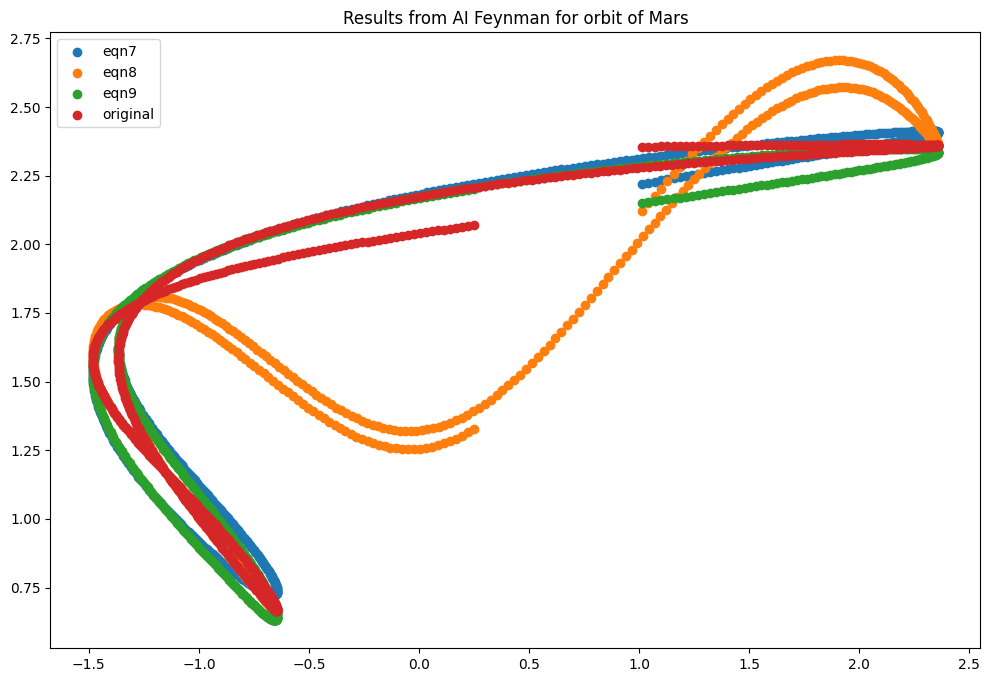

In [ ]:
from aifeynman.S_get_symbolic_expr_error import get_symbolic_expr_error
from matplotlib import pyplot as plt

plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string

with open("./results/solution_cartesian_distance_separate.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation)|("x4" in equation)|("x5" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian['mars_x'].values")
      equation = equation.replace("x1","cartesian['mars_y'].values")
      equation = equation.replace("x2","cartesian['mars_z'].values")
      equation = equation.replace("x3","cartesian['sun_x'].values")
      equation = equation.replace("x4","cartesian['sun_y'].values")
      equation = equation.replace("x5","cartesian['sun_z'].values")
      try:
            output = list(eval(equation))
            plt.scatter(cartesian['mars_x'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue

plt.scatter(cartesian['mars_x'],cartesian['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 7: np.log(3*x0 + 3*x3 + 7)
Equation 8: (x0**2*(x1*x2 + 1) + x1*x2)**0.5
Equation 9: (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5


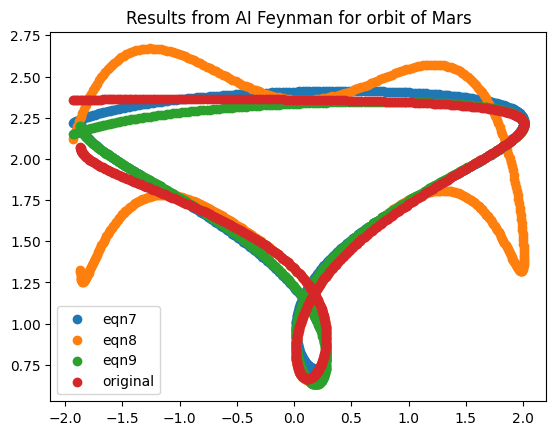

In [ ]:
with open("./results/solution_cartesian_distance.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation)|("x4" in equation)|("x5" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian['mars_x'].values")
      equation = equation.replace("x1","cartesian['mars_y'].values")
      equation = equation.replace("x2","cartesian['mars_z'].values")
      equation = equation.replace("x3","cartesian['sun_x'].values")
      equation = equation.replace("x4","cartesian['sun_y'].values")
      equation = equation.replace("x5","cartesian['sun_z'].values")
      try:
            output = list(eval(equation))
            plt.scatter(cartesian['mars_y'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue

plt.scatter(cartesian['mars_y'],cartesian['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 7: np.log(3*x0 + 3*x3 + 7)
Equation 8: (x0**2*(x1*x2 + 1) + x1*x2)**0.5
Equation 9: (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5


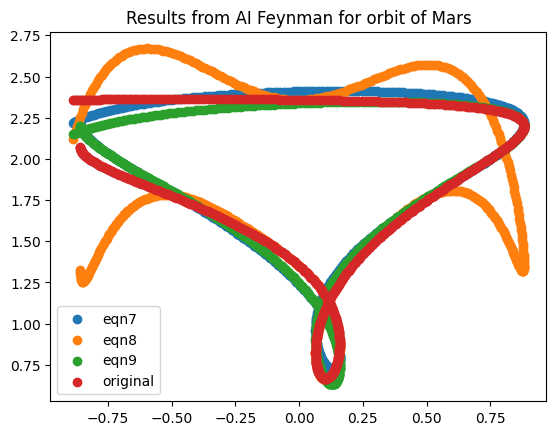

In [ ]:
with open("./results/solution_cartesian_distance.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation)|("x4" in equation)|("x5" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian['mars_x'].values")
      equation = equation.replace("x1","cartesian['mars_y'].values")
      equation = equation.replace("x2","cartesian['mars_z'].values")
      equation = equation.replace("x3","cartesian['sun_x'].values")
      equation = equation.replace("x4","cartesian['sun_y'].values")
      equation = equation.replace("x5","cartesian['sun_z'].values")
      try:
            output = list(eval(equation))
            plt.scatter(cartesian['mars_z'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue

plt.scatter(cartesian['mars_z'],cartesian['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 7: np.log(3*x0 + 3*x3 + 7)
Equation 8: (x0**2*(x1*x2 + 1) + x1*x2)**0.5
Equation 9: (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5


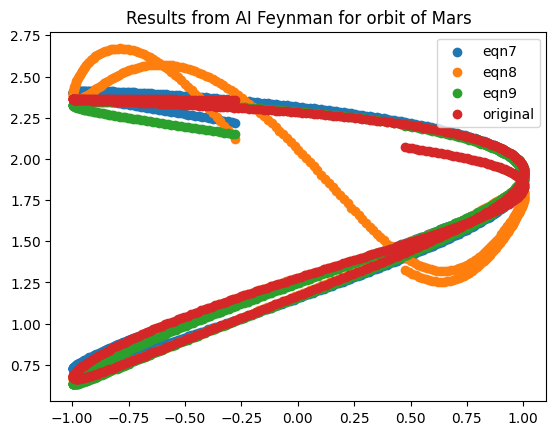

In [ ]:
with open("./results/solution_cartesian_distance.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation)|("x4" in equation)|("x5" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian['mars_x'].values")
      equation = equation.replace("x1","cartesian['mars_y'].values")
      equation = equation.replace("x2","cartesian['mars_z'].values")
      equation = equation.replace("x3","cartesian['sun_x'].values")
      equation = equation.replace("x4","cartesian['sun_y'].values")
      equation = equation.replace("x5","cartesian['sun_z'].values")
      try:
            output = list(eval(equation))
            plt.scatter(cartesian['sun_x'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue

plt.scatter(cartesian['sun_x'],cartesian['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 7: np.log(3*x0 + 3*x3 + 7)
Equation 8: (x0**2*(x1*x2 + 1) + x1*x2)**0.5
Equation 9: (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5


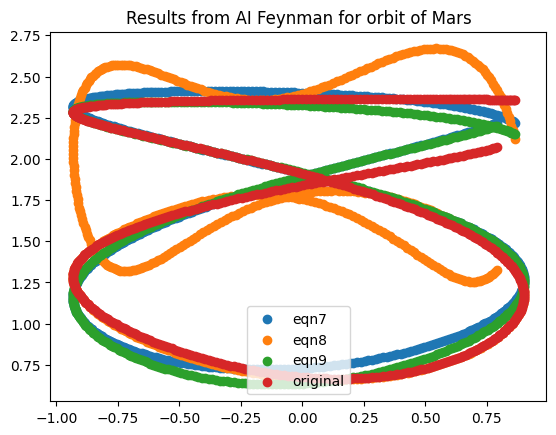

In [ ]:
with open("./results/solution_cartesian_distance.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation)|("x4" in equation)|("x5" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian['mars_x'].values")
      equation = equation.replace("x1","cartesian['mars_y'].values")
      equation = equation.replace("x2","cartesian['mars_z'].values")
      equation = equation.replace("x3","cartesian['sun_x'].values")
      equation = equation.replace("x4","cartesian['sun_y'].values")
      equation = equation.replace("x5","cartesian['sun_z'].values")
      try:
            output = list(eval(equation))
            plt.scatter(cartesian['sun_y'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue

plt.scatter(cartesian['sun_y'],cartesian['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 7: np.log(3*x0 + 3*x3 + 7)
Equation 8: (x0**2*(x1*x2 + 1) + x1*x2)**0.5
Equation 9: (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5


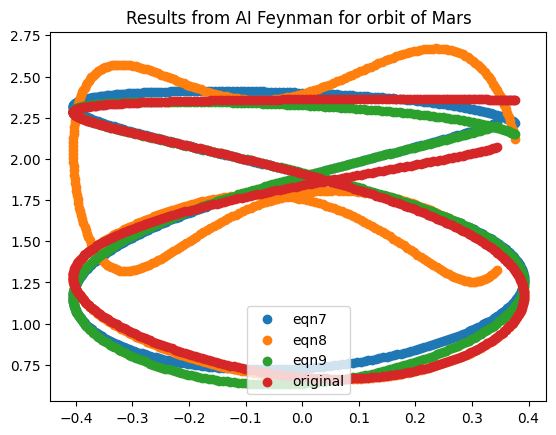

In [ ]:
with open("./results/solution_cartesian_distance.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation)|("x4" in equation)|("x5" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian['mars_x'].values")
      equation = equation.replace("x1","cartesian['mars_y'].values")
      equation = equation.replace("x2","cartesian['mars_z'].values")
      equation = equation.replace("x3","cartesian['sun_x'].values")
      equation = equation.replace("x4","cartesian['sun_y'].values")
      equation = equation.replace("x5","cartesian['sun_z'].values")
      try:
            output = list(eval(equation))
            plt.scatter(cartesian['sun_z'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue

plt.scatter(cartesian['sun_z'],cartesian['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

In [ ]:
30.644985672211643 4.937971846806065 3392.386658755767 0.0 30.653328798821 0
29.142402873040844 4.86347999848225 3341.2107589573056 1.0 29.11074787170939 1
28.75446460412644 4.844733595918863 3328.331980396259 3.0 28.734929329673307 1.50000000000000
28.69757545560831 4.841449498767706 3326.075805653414 4.0 28.669592602163526 pi/2
28.648685248840117 4.838327705803857 3323.9311338872494 4.169925001442312 28.60762263184083 1.66666666666667
28.59578659391832 4.831785548484923 3319.4366718091424 5.643856189774724 28.478189967228033 1.80000000000000
25.26487388344511 4.658928373765152 3200.683792776659 18.60964047443681 25.26255012025116 log(3*x0 + 3*x3 + 7)
24.897678417949958 4.6384852639233305 3186.6393763153283 20.094737505048094 24.907101976857753 (x0**2*(x1*x2 + 1) + x1*x2)**0.5
24.808207085626677 4.632618796646524 3182.609113296162 110.74924748494183 24.806027239766507 (1.67331072814409*x0 + 2*x3 + 3.47726370094526)**0.5